Generate Synthetic Data

In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Generating synthetic data
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)  # Two features: visit duration and pages visited
labels = (features[:, 0] + features[:, 1] > 1).astype(int)  # Purchase (1) or not (0)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels

Preprocess the Data 

In [2]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size=0.2, random_state=42)

Build and Train Neural Network

In [6]:
pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/385.2 MB 2.6 MB/s eta 0:02:26
   ---------------------------------------- 0.2/385.2 MB 2.5 MB/s eta 0:02:35
   ---------------------------------------- 0.4/385.2 MB 2.8 MB/s eta 0:02:19
   ---------------------------------------- 0.5/385.2 MB 2.5 MB/s eta 0:02:37
   ---------------------------------------- 0.6/385.2 MB 2.6 MB/s eta 0:02:27
   ---------------------------------------- 0.7/385.2 MB 2.6 MB/s eta 0:02:31
   ---------------------------------------- 0.8/385.2 MB 2.4 MB/s eta 0:02:38
   ---------------------------------------- 0.9/385.2 MB 2.5 MB/s eta 0:02:34
   ---------------------------------------- 1.0/385.2 MB 2.4 MB/s eta 0:02:38
   ---------------------------------------- 1.0/385.2 MB 2.4 MB/s eta 0:02:


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ------------- -------------------------- 1.0/3.0 MB 3.2 MB/s eta 0:00:01
   -------------- ------------------------- 1.1/3.0 MB 3.1 MB/s eta 0:00:01
   ---------------- ----------------------- 1.2/3.0 MB 3.0 MB/s eta 0:00:01
   ----------------- ---------------------- 1.3/3.0 MB 2.9 MB/s eta 0:00:01
   ------------------- -------------------- 1.5/3.0 MB 2.9 MB/s eta 0:00:01
   -------------------- ------------------- 1.6/3.0 MB 2.8 MB/s eta 0:00:01
   ---------------------- ----------------- 1.7/3.0 MB 2.8 MB/s eta 0:00:01
   ------------------------ --------------- 1.8/3.0 MB 2.8 MB/s eta 0:00:01
   ------------------------- -------------- 1.9/3.0 MB 2.8 MB/s eta 0:00:01
   --------------------------- ------------ 2.0/3.0 MB 2.7 MB/s eta 0:00:01
   ---------------------------- ----------- 2.1/3.0 MB 2.7 MB/s eta 0:00:01
   ------------------------------ --------- 2.3/3.0 MB 2.7 MB/s eta 0:00:01
   ------------------------------- -------- 2.4/3.0 MB 2.7 MB/s eta 0:00:01
   ---------

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])


In [39]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4821 - loss: 0.6931
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5345 - loss: 0.6910 
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6116 - loss: 0.6885 
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6729 - loss: 0.6831 
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.6816  
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7276 - loss: 0.6774 
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6843 - loss: 0.6790 
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7715 - loss: 0.6744 
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8082 - loss: 0.6686 
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7261 - loss: 0.6724 


Evaluate the Model 

In [41]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8417 - loss: 0.6641
Test Accuracy: 0.824999988079071


Visualizing Training Process

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8146 - loss: 0.6642 - val_accuracy: 0.8125 - val_loss: 0.6566
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7772 - loss: 0.6635 - val_accuracy: 0.8125 - val_loss: 0.6540
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7858 - loss: 0.6642 - val_accuracy: 0.8438 - val_loss: 0.6513
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8455 - loss: 0.6592 - val_accuracy: 0.8438 - val_loss: 0.6485
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7788 - loss: 0.6618 - val_accuracy: 0.8438 - val_loss: 0.6457
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8289 - loss: 0.6509 - val_accuracy: 0.8438 - val_loss: 0.6425
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7756 - loss: 0.6517 - val_accuracy: 0.8438 - val_loss: 0.6396
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8402 - loss: 0.6488 - val_accuracy: 0.8438 - val_lo

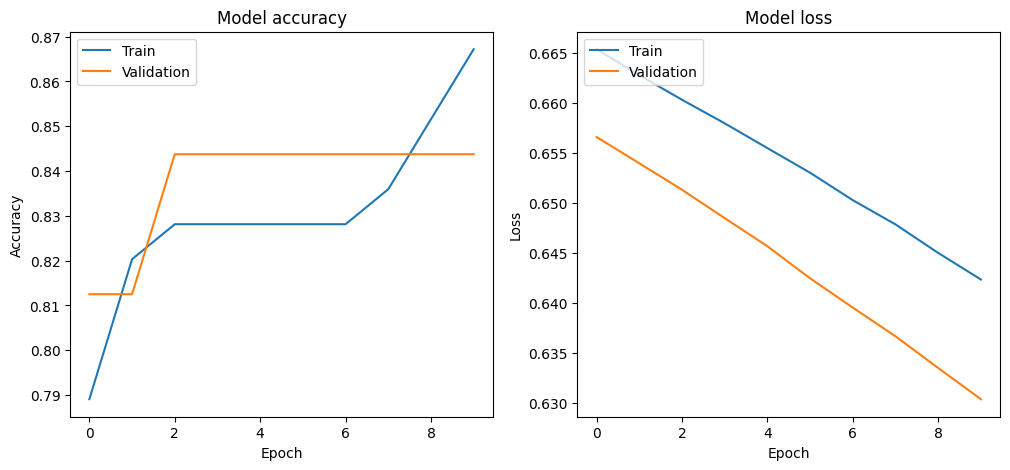

In [42]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## Decision Boundary

In the context of the neural network exercise for predicting customer purchase behavior, the decision boundary is a concept used to visualize how the neural network categorizes or classifies the data.

The Decision Boundary is a boundary in the feature space that separates the data points into different classes based on the predictions made by the model. In our exercise, we have two input features: website visit duration and number of pages visited. The decision boundary will be a line or curve in this 2-dimensional space that separates the points predicted to make a purchase (class 1) from those predicted not to make a purchase (class 0).

How It's Determined - The neural network learns the decision boundary during training. It adjusts its internal parameters (weights and biases) to correctly classify the training data. The boundary is where the model's output (before applying a threshold) is at some critical value, often 0.5 for binary classification with a sigmoid output. Points on one side of the boundary are classified as one class, and points on the other side as the other class.
Visualization - In the plot, the decision boundary is typically represented by a line or contour. Points falling on one side of the boundary are predicted to be in one class, and those on the other side in the other class. The decision boundary can be linear or non-linear depending on the complexity of the model and the nature of the data.
The decision boundary in our neural network example serves as a visual tool to understand how the model differentiates between customers likely to make a purchase and those who are not, based on their website engagement metrics

Creating the Visual


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


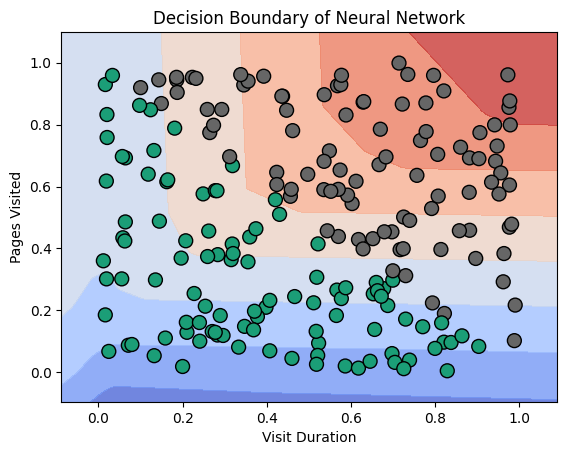

In [43]:
# Generate a grid over the feature space
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour with a different color map
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')  # You can change 'coolwarm' to any other colormap like 'viridis', 'plasma', etc.

# Plot the scatter plot with custom colors
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k', cmap='Dark2', s=100)  # Using 'Dark2' for the color of points
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')

# Show the plot
plt.show()
